In [4]:
from os import listdir
from os.path import isdir
from numpy import asarray
import numpy as np
import cv2 as cv
from sklearn import svm, metrics
import matplotlib.pyplot as plt

In [35]:
width = 128 # image width
height = 128 # image height
dim = (width, height)

In [36]:
def load_images (directory):
    images = list ()
    for filename in listdir(directory) :
        path = directory + filename # path
        if filename == ".DS_Store":
            continue
        img = cv.imread(path)
        resized = cv.resize(img, dim, interpolation = cv.INTER_AREA) # resize
        normalized_image = cv.normalize (resized, None, 0, 1, cv.NORM_MINMAX, dtype=cv.CV_32F)
        arr = np.array(normalized_image) # covert to numpuy array
        newarr = arr.reshape (-1) # convert to 1-D array
        images.append (newarr) # store

    return images

# load a dataset 
def load_dataset(directory):
    X, y = list(), list()
    for subdir in listdir(directory):
        path = directory + subdir + '/' # path 
        if not isdir(path):
            continue 
        images = load_images(path) 
        labels = [subdir for _ in range(len(images))] # generate label list 
        print('>loaded %d examples for class: %s' % (len(images), subdir)) 
        print ('Label name:', labels) 
        X.extend(images) # add images to X
        y.extend(labels) # add label to y 
    return asarray(X), asarray(y)

>loaded 10 examples for class: Maksims
Label name: ['Maksims', 'Maksims', 'Maksims', 'Maksims', 'Maksims', 'Maksims', 'Maksims', 'Maksims', 'Maksims', 'Maksims']
>loaded 10 examples for class: Ronaldo
Label name: ['Ronaldo', 'Ronaldo', 'Ronaldo', 'Ronaldo', 'Ronaldo', 'Ronaldo', 'Ronaldo', 'Ronaldo', 'Ronaldo', 'Ronaldo']
>loaded 10 examples for class: Porzingis
Label name: ['Porzingis', 'Porzingis', 'Porzingis', 'Porzingis', 'Porzingis', 'Porzingis', 'Porzingis', 'Porzingis', 'Porzingis', 'Porzingis']
>loaded 10 examples for class: Lebron
Label name: ['Lebron', 'Lebron', 'Lebron', 'Lebron', 'Lebron', 'Lebron', 'Lebron', 'Lebron', 'Lebron', 'Lebron']
>loaded 10 examples for class: Gomez
Label name: ['Gomez', 'Gomez', 'Gomez', 'Gomez', 'Gomez', 'Gomez', 'Gomez', 'Gomez', 'Gomez', 'Gomez']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


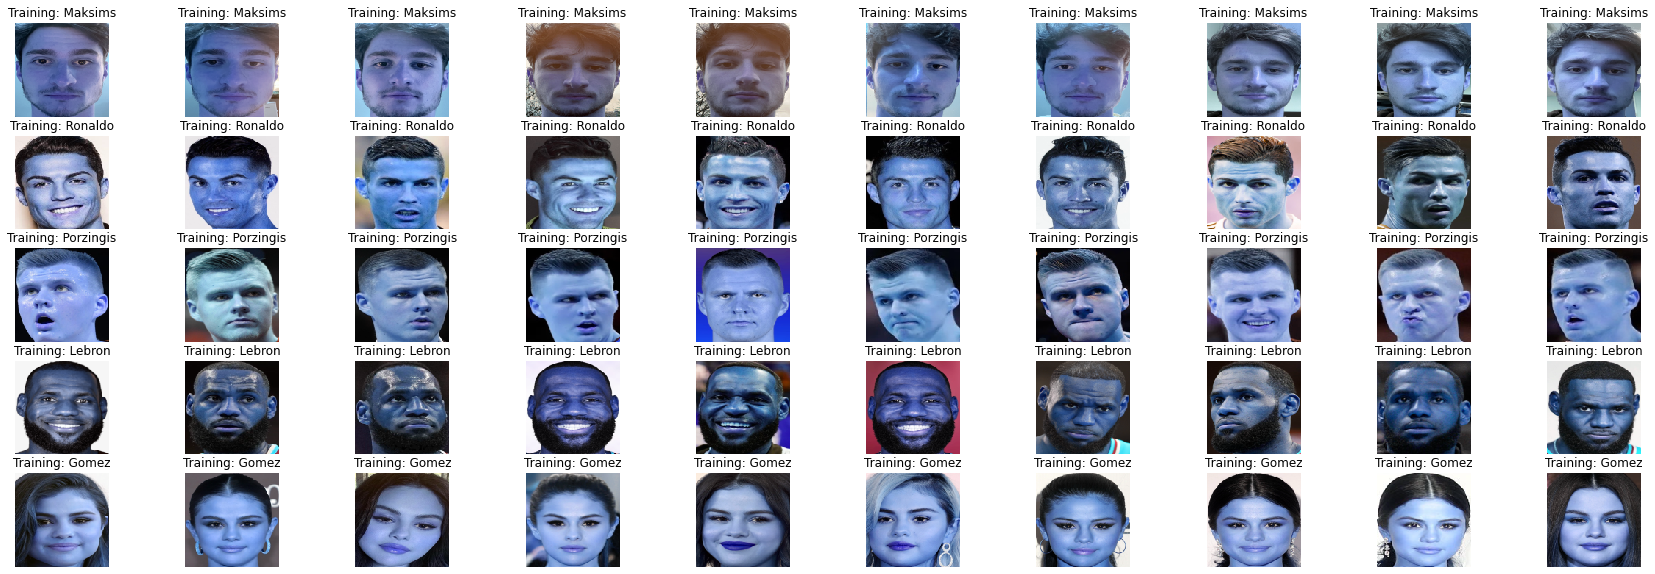

---SVM model initialized---
---Fit data into SVM---


SVC(gamma='auto')

In [91]:
trainX, trainy = load_dataset('dataset/images/')

_, axes = plt.subplots(nrows=5, ncols=10, figsize=(30,10))
for i in range(len(axes)):
    for ax, image, label in zip(axes[i], trainX[i*10:i*10+10], trainy[i*10:i*10+10]):
        ax.set_axis_off()
        image = image.reshape(128,128,3)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f'Training: {label}')
plt.show()

print("---SVM model initialized---")
clf = svm.SVC(gamma='auto')
print("---Fit data into SVM---")
clf.fit(trainX, trainy)

In [92]:
# load unknown images
testX = list ()
testy = list()
directory = "unknown/Images/"
images = ['Maksims.jpg', 'Lebron.jpg']
print("---Loading unknown images---")
for filename in images:
    path = directory + filename # path
    img = cv.imread(path)
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA) # resize
    normalized_image = cv.normalize (resized, None, 0, 1, cv.NORM_MINMAX, dtype=cv.CV_32F)
    arr = np.array(normalized_image) # covert to numpuy array
    newarr = arr.reshape (-1) # convert to 1-D array
    testX.append (newarr) # store
    testy.append(filename[:-4]) # store label


---Loading unknown images---


---Predicting with trained SVM model---


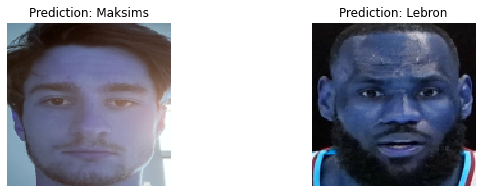

Classification report for classifier SVC(gamma='auto'):
              precision    recall  f1-score   support

      Lebron       1.00      1.00      1.00         1
     Maksims       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2




In [93]:
print("---Predicting with trained SVM model---")
predicted = clf.predict(testX)

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
for ax, image, prediction in zip(axes, testX, predicted):
    ax.set_axis_off()
    image = image.reshape(128,128,3)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'Prediction: {prediction}')
plt.show()

print(f"Classification report for classifier {clf}:\n"
     f"{metrics.classification_report(testy, predicted)}\n")